In [2]:
import sys
sys.path.append('..')

In [3]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# loading the sameple datasets into DataFrames
data_1 = pd.read_csv("../data/1_space_cluster_samples.csv")
data_3 = pd.read_csv("../data/3_space_cluster_samples.csv")
data_5 = pd.read_csv("../data/5_space_cluster_samples.csv")
data_7 = pd.read_csv("../data/7_space_cluster_samples.csv")

# pulling the data that will be used to train the model out of the datasets and storing them to individual DataFrames
X_1 = data_1[[str(x) for x in range(1, 10)]]
X_3 = data_3[[str(x) for x in range(1, 10)]]
X_5 = data_5[[str(x) for x in range(1, 10)]]
X_7 = data_7[[str(x) for x in range(1, 10)]]

# putting the training data into a list so we can iteratively test models
X = [X_1, X_3, X_5, X_7]

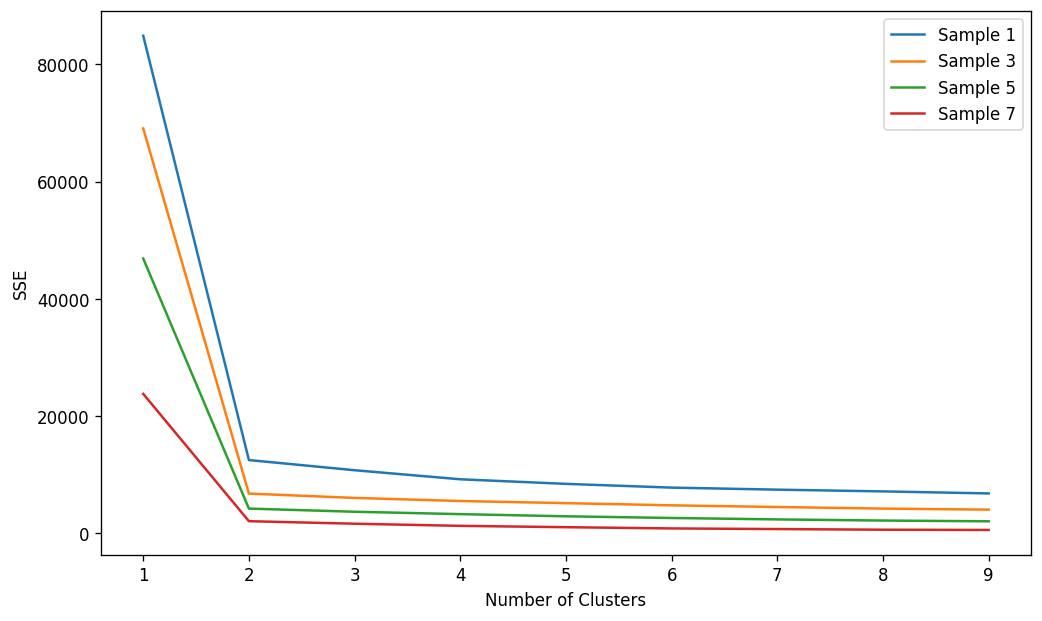

In [27]:
# initializing our plot
plt.figure(figsize=(10, 6), dpi=120)

# iteratively building models to identify an 'elbow' in the chart so that we may more easily identify the appropriate number of clusters
for i, df in enumerate(X):
    sse = dict()
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=2500).fit(df)
        sse[k] = kmeans.inertia_ # measured squared error
    plt.plot(list(sse.keys()), list(sse.values()), label=f"Sample {(2 * i) + 1}")

plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc="upper right")
plt.show()

There is a clearly defined elbow at k=2 clusters in all 4 sample sets.